In [1]:
import pandas as pd
import sklearn.cluster
import pandas as pd
import numpy as np
import math
import operator
import sklearn
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#importlib.invalidate_caches()
%load_ext autoreload
%autoreload 2

In [2]:
playlists = pd.read_pickle('../Pickle_Files/playlists.pkl')

In [3]:
playlists.head()

,collaborative,description,duration_ms,modified_at,name,num_albums,num_artists,num_edits,num_followers,num_tracks,pid
0,false,None,12395868,1508457600,country songs,41,33,29,1,58,315000
1,false,None,36317989,1505174400,Weekend,113,88,16,3,156,315001
2,false,None,31494581,1491436800,get turnt,120,92,25,3,140,315002
3,false,None,31114725,1506297600,Praise and Worship,15,8,9,1,215,315003
4,false,None,6724683,1504051200,arizona,31,30,25,1,31,315004


In [4]:
playlists['seconds'] = playlists['duration_ms']/1000
playlists['hours'] = playlists['seconds']/3600

#### Averages

In [5]:
print('Average Num_edits: ' + str((playlists['num_edits']).mean()))
print('Average Num_artists: ' + str((playlists['num_artists']).mean()))
print('Average Num_followers: ' + str((playlists['num_followers']).mean()))
print('Average Num_tracks: ' + str((playlists['num_tracks']).mean()))
print('Average playlist_duration/hours: ' + str((playlists['hours'].mean())))

Average Num_edits: 17.655902
Average Num_artists: 38.088211
Average Num_followers: 2.597746
Average Num_tracks: 66.346428
Average playlist_duration/hours: 4.327688011860555


#### Max/Min

In [6]:
print('Max Num_edits: ' + str((playlists['num_edits']).max()))
print('Max Num_artists: ' + str((playlists['num_artists']).max()))
print('Max Num_followers: ' + str((playlists['num_followers']).max()))
print('Max Num_tracks: ' + str((playlists['num_tracks']).max()))
print('Max playlist_duration/mins: ' + str((playlists['hours'].max())))
print('\n')
print('Min Num_edits: ' + str((playlists['num_edits']).min()))
print('Min Num_artists: ' + str((playlists['num_artists']).min()))
print('Min Num_followers: ' + str((playlists['num_followers']).min()))
print('Min Num_tracks: ' + str((playlists['num_tracks']).min()))
print('Min playlist_duration/hours: ' + str((playlists['hours'].min())))

Max Num_edits: 201
Max Num_artists: 238
Max Num_followers: 71643
Max Num_tracks: 376
Max playlist_duration/mins: 176.40938666666668


Min Num_edits: 1
Min Num_artists: 3
Min Num_followers: 1
Min Num_tracks: 5
Min playlist_duration/hours: 0.02709388888888889


#### Top 10 Playlists

In [7]:
playlists.sort_values(['num_followers'],ascending=False).head(10)

,collaborative,description,duration_ms,modified_at,name,num_albums,num_artists,num_edits,num_followers,num_tracks,pid,seconds,hours
449269,false,None,10567634,1491523200,That's What I Like,37,31,7,71643,39,248269,10567.634,2.935454
484359,false,Every song ever featured on Breaking Bad!,23561532,1381104000,Breaking Bad,102,101,26,53519,106,746359,23561.532,6.544870
580472,false,None,27955610,1509062400,One Tree Hill,85,78,8,45942,111,399472,27955.610,7.765447
113831,false,None,11824924,1478908800,My Little Pony,9,25,6,31539,85,180831,11824.924,3.284701
343740,false,"Jack's <a href=""http://instagram.com/thatsojac...",18541204,1458604800,Q1,75,72,63,27830,81,720740,18541.204,5.150334
331144,false,None,6654437,1496793600,Jack's Playlist,28,26,4,23500,29,928144,6654.437,1.848455
42077,false,None,12528923,1509408000,Rock Hits,54,54,6,22102,56,159077,12528.923,3.480256
827215,false,All that pop goodness. Playlist image: <a href...,11005740,1501804800,TOP POP,46,41,2,15842,52,7215,11005.740,3.057150
937280,false,None,3213942,1424822400,FARRUKO,12,7,3,15123,13,768280,3213.942,0.892762
832495,false,None,27640823,1459209600,Wiz Khalifa,21,4,8,14812,115,25495,27640.823,7.678006


#### Less/More

98% of playlist have less than 5 followers!

In [8]:
print('Less than 50 tracks: ' + str(len(playlists[playlists['num_tracks']<=100])))
print('More than 50 tracks: ' + str(len(playlists[playlists['num_tracks']>100])))
print('\n')
print('Less than 20 artists: ' + str(len(playlists[playlists['num_artists']<=20])))
print('More than 20 artists: ' + str(len(playlists[playlists['num_artists']>20])))
print('\n')
print('Less than 20 albums: ' + str(len(playlists[playlists['num_albums']<=20])))
print('More than 20 albums: ' + str(len(playlists[playlists['num_albums']>20])))
print('\n')
print('Less than 5 followers: ' + str(len(playlists[playlists['num_followers']<=5])))
print('More than 5 followers: ' + str(len(playlists[playlists['num_followers']>5])))

Less than 50 tracks: 783518
More than 50 tracks: 216482


Less than 20 artists: 344507
More than 20 artists: 655493


Less than 20 albums: 261434
More than 20 albums: 738566


Less than 5 followers: 980162
More than 5 followers: 19838


#### Most Popular Playlist Names

In [9]:
import nltk
from nltk.tokenize import RegexpTokenizer

def tokenize(series):
    
    TOKENIZER_REGEX = r'\w+'
    tokenizer = nltk.tokenize.RegexpTokenizer(TOKENIZER_REGEX)  
    return tokenizer.tokenize(series)

In [10]:
playlists['name'] = playlists.name.str.lower() 
playlists['name_tokenized'] = playlists['name'].apply(tokenize)
print(playlists['name_tokenized'].value_counts().head(20))

[]              15284
[country]       10347
[chill]         10196
[rap]            8588
[workout]        8581
[christmas]      8375
[oldies]         8146
[rock]           6963
[party]          6241
[throwback]      5882
[jams]           5062
[summer]         5057
[worship]        5052
[lit]            4760
[feels]          4677
[new]            4608
[disney]         4269
[throwbacks]     4030
[music]          3920
[sleep]          3625
Name: name_tokenized, dtype: int64


#### Collaborative Y/N

97.7% of Playlists are Not Collaborative

In [11]:
print( 'Not Collaborative: ' + str(len(playlists[playlists['collaborative']=='false'])) )
print( 'Collaborative:     ' + str(len(playlists[playlists['collaborative']=='true'])) )

Not Collaborative: 977431
Collaborative:     22569


### Graphs

### Distribution of Tracks

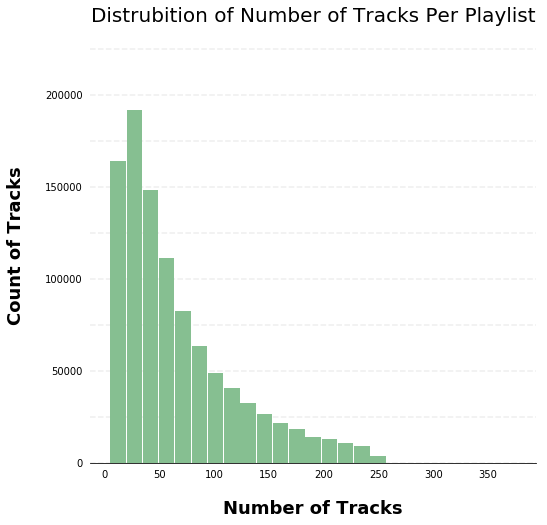

In [16]:
ax = playlists.hist(column='num_tracks', bins=25, grid=False, figsize=(8,8), color='#86bf91', zorder=2, rwidth=.95)

ax = ax[0]
for x in ax:

    
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
   
    x.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)

    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=1, color='#eeeeee', zorder=1)

    
    x.set_title("Distrubition of Number of Tracks Per Playlist",size=20)

   
    x.set_xlabel("Number of Tracks", labelpad=20, weight='bold', size=18)

   
    x.set_ylabel("Count of Tracks", labelpad=20, weight='bold', size=18)

#### Number of Playlists over 25 hours playtime

In [13]:
playlists = playlists.drop('description',axis=1)

In [14]:
over_25_hours = str((playlists[playlists['hours'] >= 25]).count().unique())

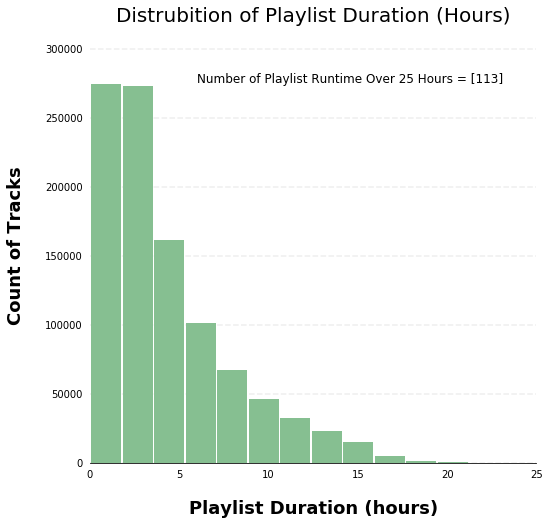

In [15]:
ax = playlists.hist(column='hours', bins=100, grid=False, figsize=(8,8), color='#86bf91', zorder=2, rwidth=.95)

ax = ax[0]
for x in ax:

    
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

   
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=1, color='#eeeeee', zorder=1)

    
    x.set_title("Distrubition of Playlist Duration (Hours)",size=20)

    x.text(s=str('Number of Playlist Runtime Over 25 Hours = '+ over_25_hours),x=6,y=275000,size='12')
    x.set_xlabel("Playlist Duration (hours)", labelpad=20, weight='bold', size=18)

   
    x.set_ylabel("Count of Tracks", labelpad=20, weight='bold', size=18)
    x.set_xlim(0, 25)